In [1]:
from numba import jit
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def calculate_pi_collisions(n_digits):
    # Mass ratio: m2/m1 = 100^(n-1)
    m1 = 1  # Mass of the first ball
    m2 = 10**(n_digits - 1)  # Mass of the second ball. for 100,000,000 takes 1 min to run.

    # Initial velocities
    v1 = 0  # Ball 1 starts stationary
    v2 = -1  # Ball 2 moves toward Ball 1
    collisions = 0  # Count collisions
    x = []
    y = []

    while True:
        # Check for collision between the balls
        if v2 < v1:
            collisions += 1
            # Update velocities using elastic collision formulas
            new_v1 = ((m1 - m2) / (m1 + m2)) * v1 + (2 * m2 / (m1 + m2)) * v2
            new_v2 = ((m2 - m1) / (m1 + m2)) * v2 + (2 * m1 / (m1 + m2)) * v1
            v1, v2 = new_v1, new_v2

        # Check for collision with the wall (Ball 1 hitting wall)
        if v1 < 0:
            collisions += 1
            v1 = -v1  # Reverse velocity of Ball 1

        # Stop if Ball 2 is moving away from Ball 1
        if v2 >= v1:
            break

    return collisions


# Example: Calculate π to 3 digits
n_digits = 3
pi_collisions = calculate_pi_collisions(n_digits)
print(f"Number of collisions: {pi_collisions}")



Number of collisions: 31


In [2]:

pow_ten = 10

def calculate_pi_collisions(n_digits):
    m1 = 1
    m2 = pow_ten**(n_digits - 1)
    v1 = 0
    v2 = -1
    collisions = 0
    x_values = []
    y_values = []

    while True:
        if v2 < v1:
            collisions += 1
            new_v1 = ((m1 - m2) / (m1 + m2)) * v1 + (2 * m2 / (m1 + m2)) * v2
            new_v2 = ((m2 - m1) / (m1 + m2)) * v2 + (2 * m1 / (m1 + m2)) * v1
            v1, v2 = new_v1, new_v2
            y_values.append(np.sqrt(m1) * v1)
            x_values.append(np.sqrt(m2) * v2)

        if v1 < 0:
            collisions += 1
            v1 = -v1
            y_values.append(np.sqrt(m1) * v1)
            x_values.append(np.sqrt(m2) * v2)

        if v2 >= v1:
            break

    return collisions, x_values, y_values

n_digits = 15
pi_collisions, x_values, y_values = calculate_pi_collisions(n_digits)
print(f"Number of collisions: {pi_collisions}")

plt.figure(figsize=(8,8))
# plot circle of radius pow_ten
circle = plt.Circle((0, 0), pow_ten, color='r', fill=False)
plt.gca().add_artist(circle)
# plot the points
plt.plot(x_values, y_values, marker='o')
plt.xlabel(r'$x = \sqrt{m1} \cdot v1$')
plt.ylabel(r'$y = \sqrt{m2} \cdot v2$')
plt.title('Plot')
plt.grid(True)
plt.show()

Number of collisions: 31415926


Number of collisions: 31415926


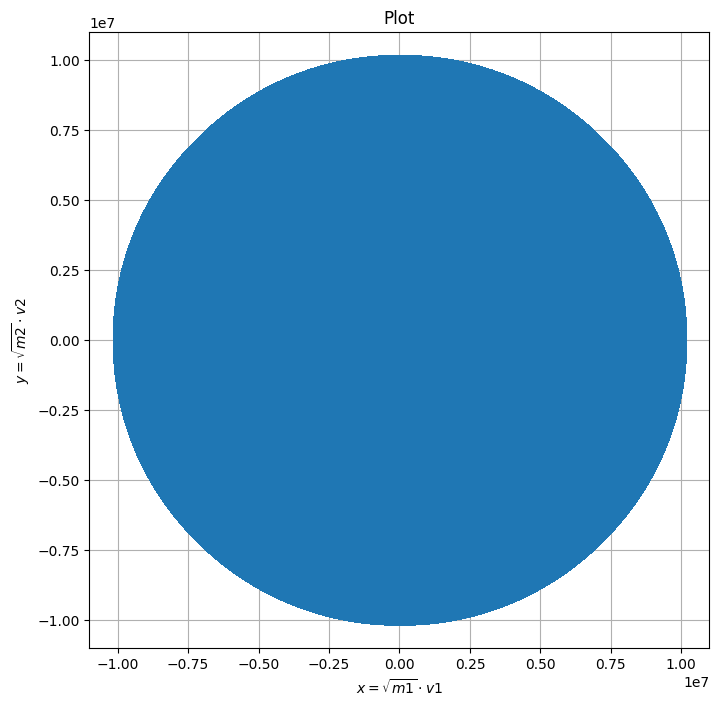

In [25]:

pow_ten = 10

def calculate_pi_collisions(n_digits):
    m1 = 1
    m2 = pow_ten**(n_digits - 1)
    v1 = 0
    v2 = -1
    collisions = 0
    x_values = []
    y_values = []

    # for calculating the new v1
    ratio_1 = (m1 - m2) / (m1 + m2)
    ratio_2 = 2 * m2 / (m1 + m2)

    # for calculating the new v2
    ratio_3 = (m2 - m1) / (m1 + m2)
    ratio_4 = 2 * m1 / (m1 + m2)

    m2_sqrt = np.sqrt(m2)
    m1_sqrt = np.sqrt(m1)

    while True:
        if v2 < v1:
            collisions += 1
            new_v1 = ratio_1 * v1 + ratio_2 * v2
            new_v2 = ratio_3 * v2 + ratio_4 * v1
            v1, v2 = new_v1, new_v2
            y_values.append(m1_sqrt * v1)
            x_values.append(m2_sqrt * v2)
        if v1 < 0:
            collisions += 1
            v1 = -v1
            y_values.append(m1_sqrt * v1)
            x_values.append(m2_sqrt * v2)
        if v2 >= v1:
            break

    return collisions, x_values, y_values

n_digits = 15
pi_collisions, x_values, y_values = calculate_pi_collisions(n_digits)
print(f"Number of collisions: {pi_collisions}")

plt.figure(figsize=(8,8))
# plot circle of radius pow_ten
circle = plt.Circle((0, 0), pow_ten, color='r', fill=False)
plt.gca().add_artist(circle)
# plot the points
plt.plot(x_values, y_values, marker='o')
plt.xlabel(r'$x = \sqrt{m1} \cdot v1$')
plt.ylabel(r'$y = \sqrt{m2} \cdot v2$')
plt.title('Plot')
plt.grid(True)
plt.show()